# Telecom-Churn

#### Business Case:
No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and retaining customers becoming a challenge.In spite of No-Churn 
initiatives of reducing tariffs and promoting more offers, the churn rate (percentage of customers migrating to competitors) 
is well above 10%.No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain 
competitive edge in the industry.

#### PROJECT GOAL
Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers to migrate.
2. Creating Churn risk scores that can be indicative to drive retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers
   can be targeted to Churn YES customers help to identify possible CHURN-FLAG YES customers and provide more attention in 
   customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority 
   for quick resolutions any questions they may have etc.,
    

Description:-
    
State: Represents the state in which the customer resides (e.g., KS for Kansas, OH for Ohio).

Account Length: Indicates the number of days the customer has been a subscriber.

Area Code: Represents the area code associated with the customer's phone number.

Phone: Represents the customer's phone number.

International Plan: Indicates whether the customer has an international calling plan (yes or no).

VMail Plan: Indicates whether the customer has a voicemail plan (yes or no).

VMail Message: Represents the number of voicemail messages the customer has.

Day Mins: Represents the total number of minutes the customer has used during the day.

Day Calls: Indicates the total number of calls the customer has made during the day.

Day Charge: Represents the total charge for daytime calls.

Eve Mins: Represents the total number of minutes the customer has used during the evening.

Eve Calls: Indicates the total number of calls the customer has made during the evening.

Eve Charge: Represents the total charge for evening calls.

Night Mins: Represents the total number of minutes the customer has used during the night.

Night Calls: Indicates the total number of calls the customer has made during the night.

Night Charge: Represents the total charge for nighttime calls.

International Mins: Represents the total number of international minutes the customer has used.

International Calls: Indicates the total number of international calls the customer has made.

International Charge: Represents the total charge for international calls.

CustServ Calls: Indicates the number of customer service calls made by the customer.

Churn: Indicates whether the customer has churned (canceled their subscription) or not (False).

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
df = pd.read_csv('telco_churn.csv')
df.head()

,Unnamed: 0,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Listing of column headers

In [3]:
# List of column headers
headerList = ['SL.No', 'State', 'Account_Length', 'Area_Code','Phone','International_Plan','VMail_Plan','VMail_Message',
              'Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge',
             'International_Mins','International_calls','International_Charge','CustServ_Calls','Churn']
# converting data frame to csv
df.to_csv("telco_churn_new.csv", header=headerList, index=False)

# display modified csv file
df1 = pd.read_csv("telco_churn_new.csv")
df1.head(5)

,SL.No,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### EDA - Exploratory Data Analysis

In [4]:
df1.drop(['SL.No'],axis=1,inplace=True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [6]:
df1.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df2 = df1.copy()

In [8]:
df2.head(5)

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
df1.shape

(4617, 21)

In [10]:
#checking the missing values
df1.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

### Checking distribution of target variable

#### Plot bar chart

<Axes: xlabel='Churn', ylabel='count'>

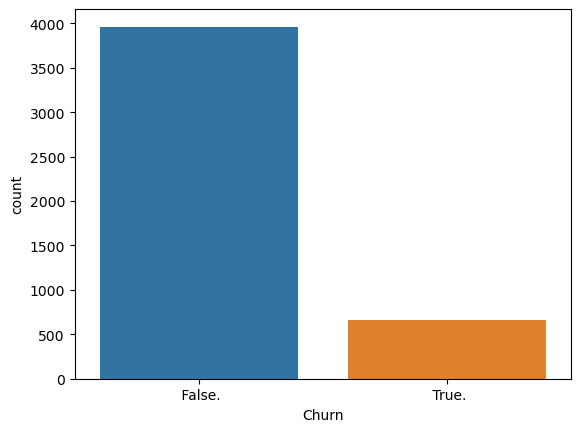

In [11]:
sns.countplot(x="Churn",data=df1)

#### Pie Chart

([<matplotlib.patches.Wedge at 0x23edfb45ff0>,
 [Text(-0.9922226950444745, 0.47486221521477157, '0'),
  Text(1.8942433693419938, -0.9065550494613615, '1')],
 [Text(-0.5412123791151678, 0.25901575375351177, '85.79%'),
  Text(1.4432330433081857, -0.6907086091134182, '14.21%')])

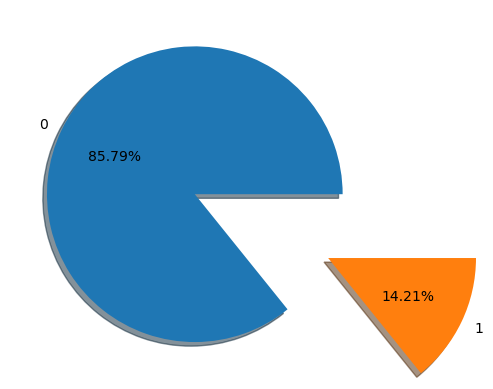

In [12]:
plt.pie(df1["Churn"].value_counts(),labels=[0,1] ,autopct='%1.2f%%' ,explode=(0,1) ,shadow=True)

#### Plot histogram

<Axes: >

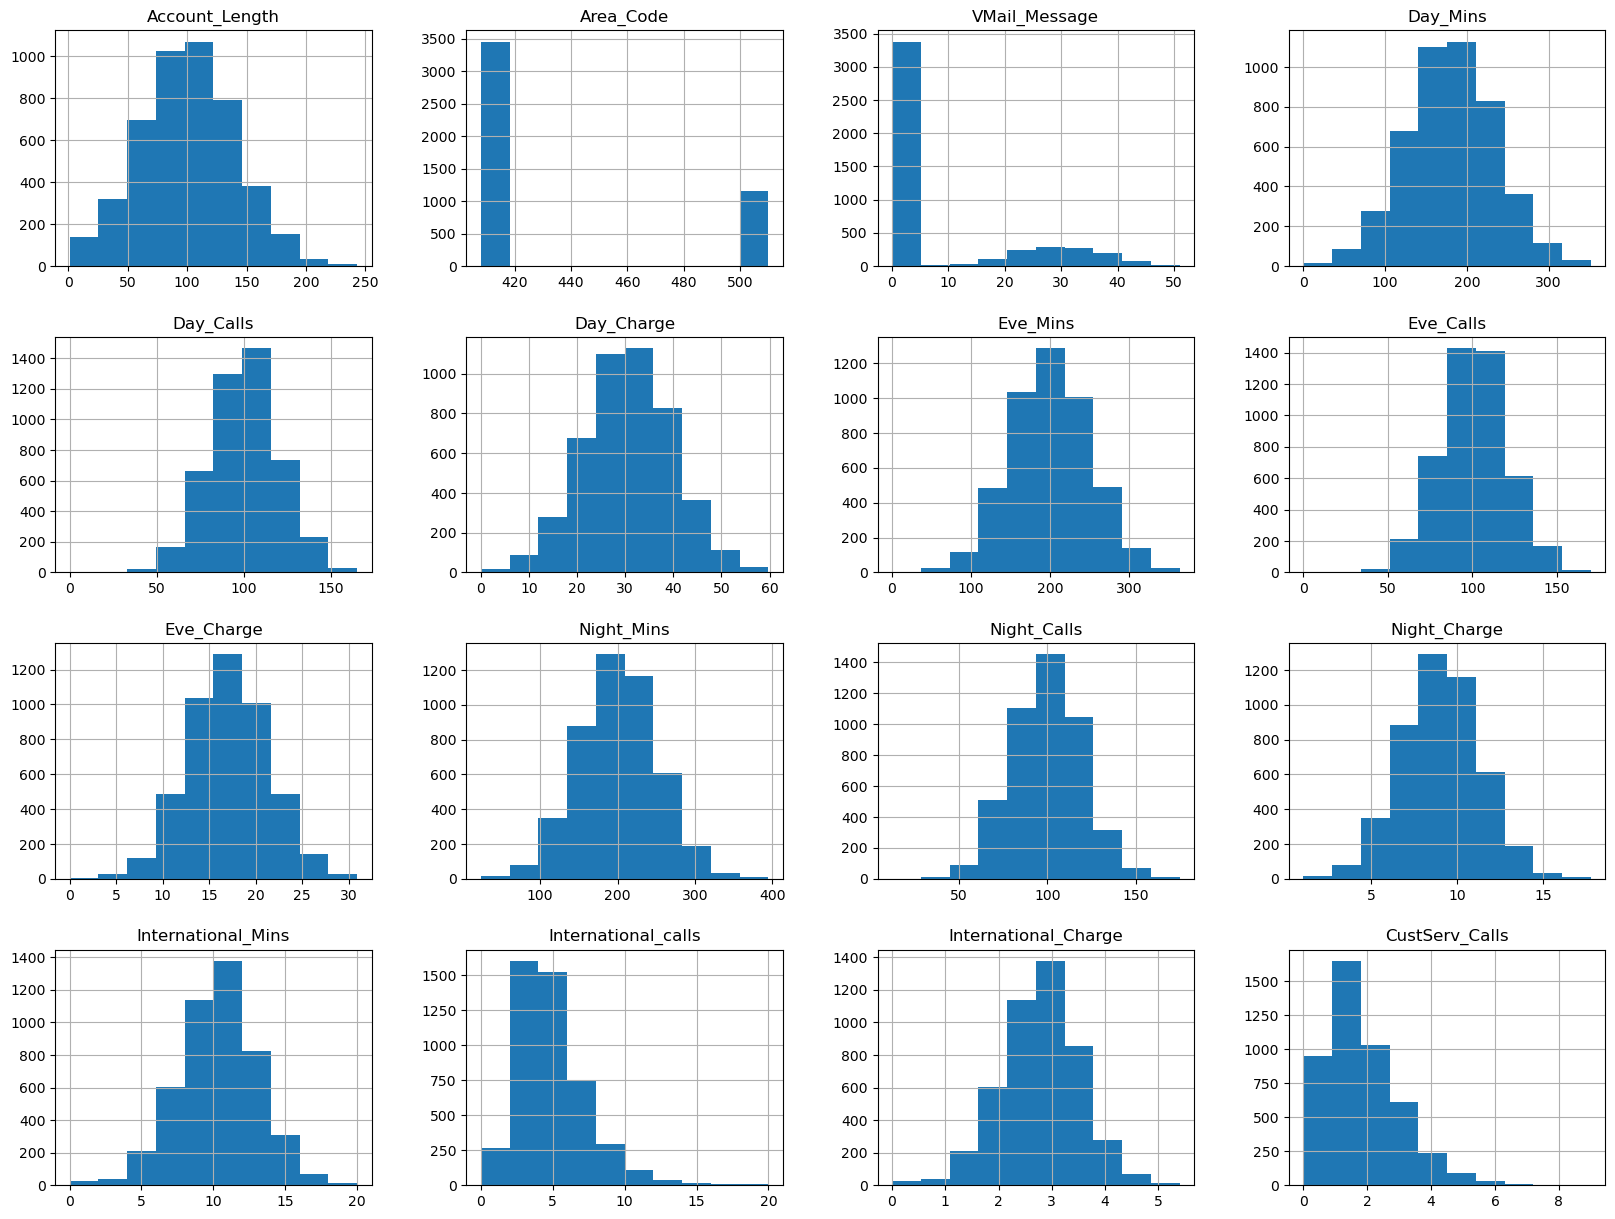

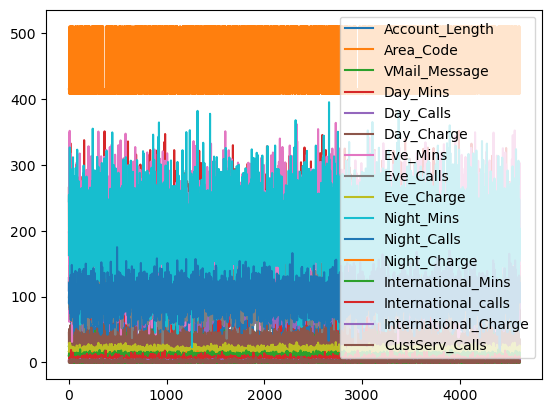

In [13]:
df1.hist(bins=10, figsize=(20,15))
df1.plot()

### Density Plot

<Axes: xlabel='International_calls', ylabel='Density'>

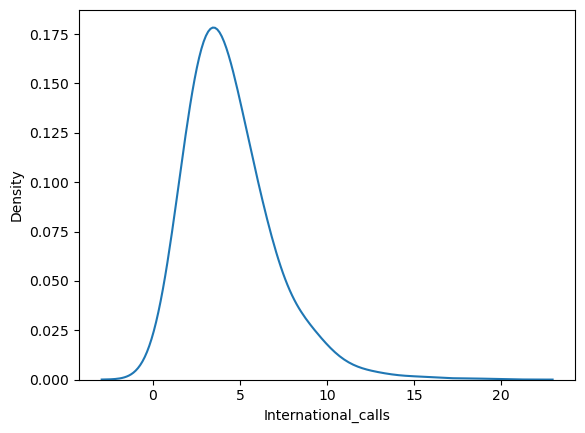

In [14]:
sns.kdeplot(df1['International_calls'], bw = 0.4)

<Axes: xlabel='CustServ_Calls', ylabel='Density'>

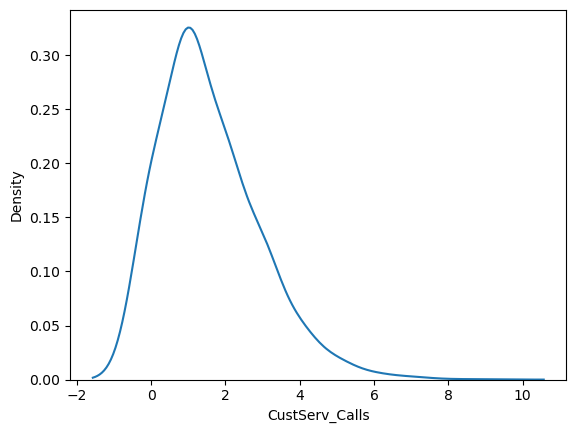

In [15]:
sns.kdeplot(df1['CustServ_Calls'], bw = 0.4)

<Axes: xlabel='VMail_Message', ylabel='Density'>

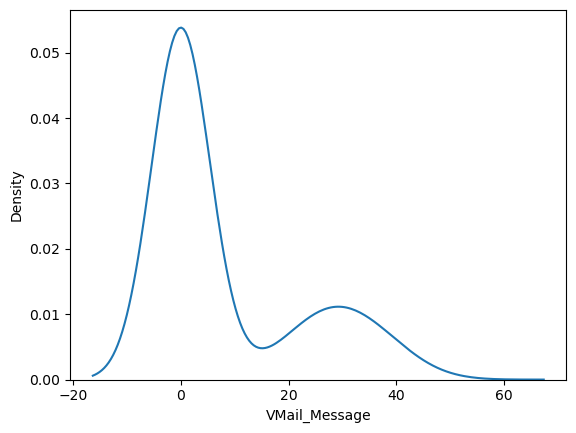

In [16]:
sns.kdeplot(df1['VMail_Message'], bw = 0.4)

Large number of people do not have Voice mail(which is Median). Dropping is not recommended

#### Box Plot

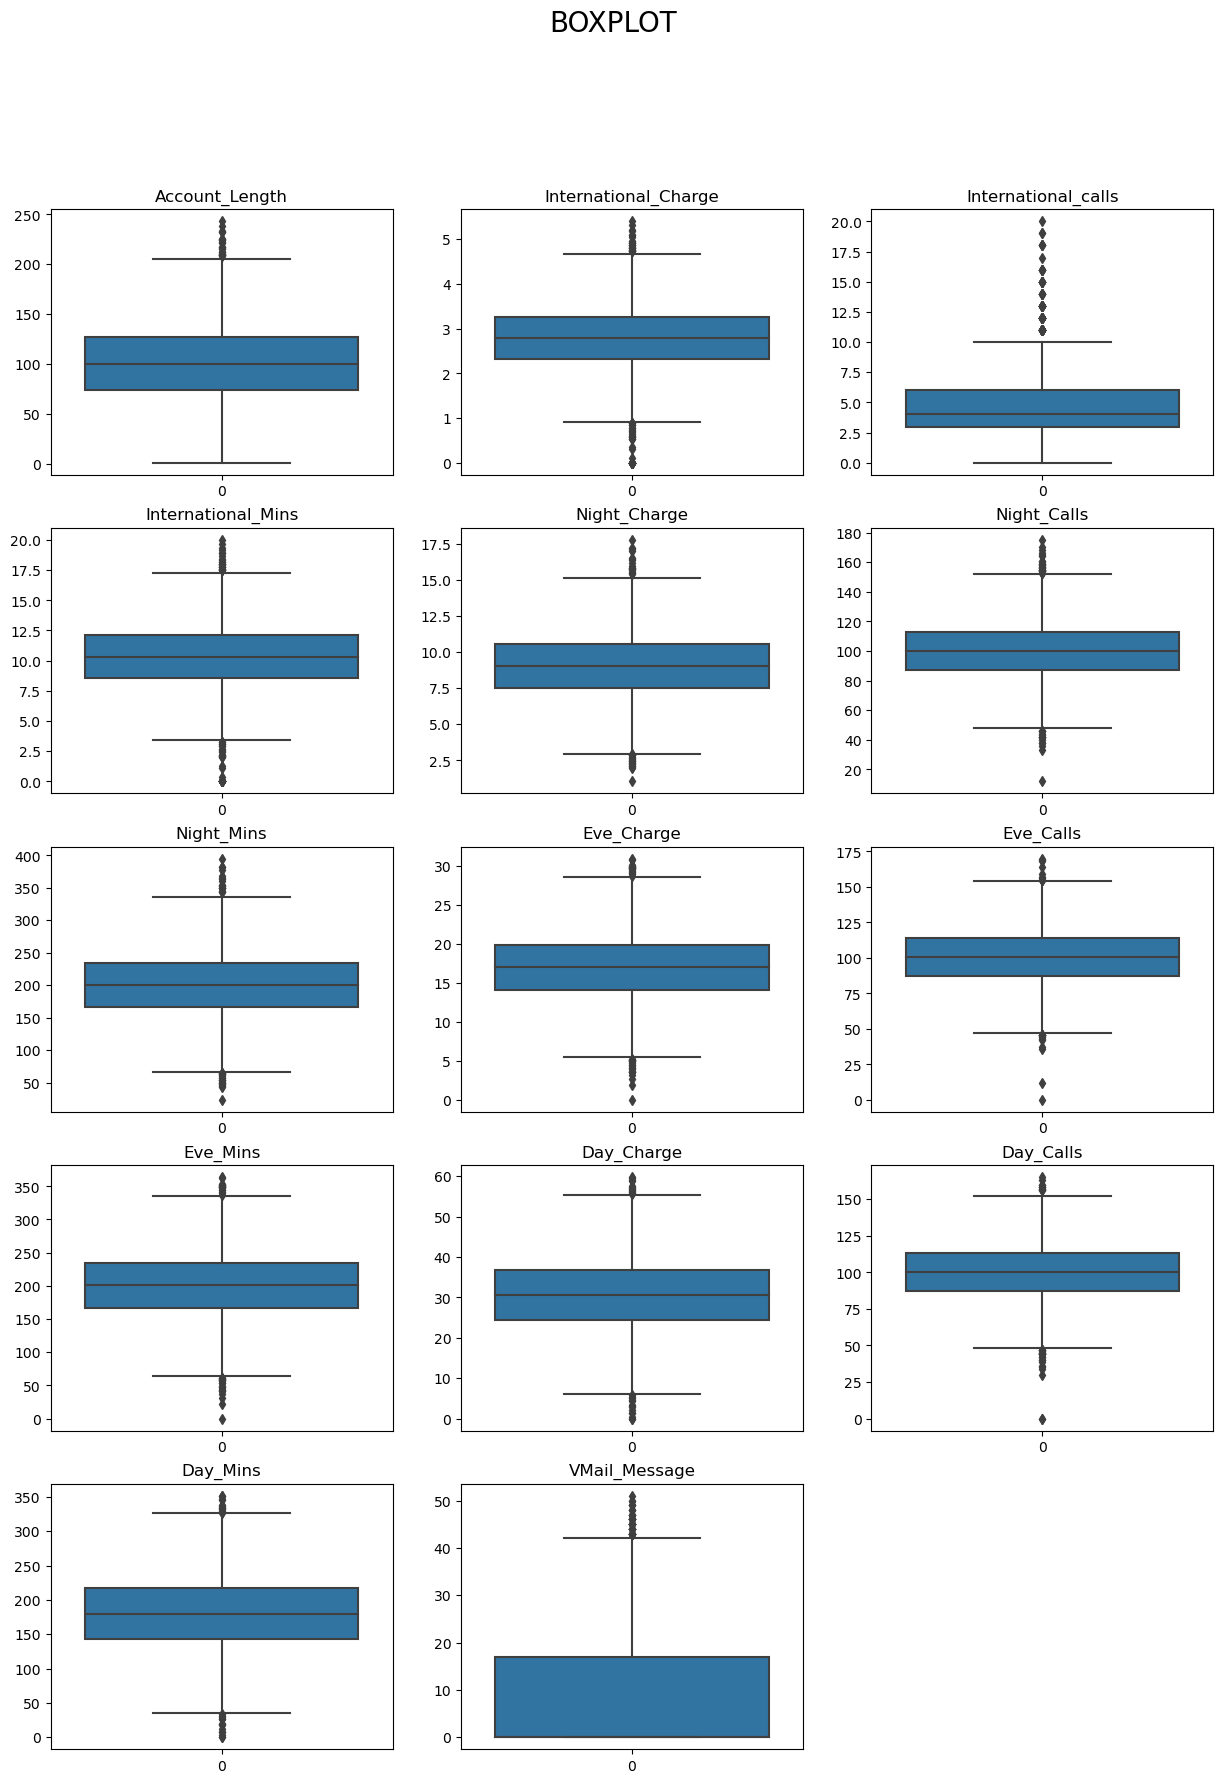

In [17]:
plt.figure(figsize = (15,20))
plt.subplot(5,3,1)
sns.boxplot(df1['Account_Length'])
plt.title('Account_Length')
plt.subplot(5,3,2)
sns.boxplot(df1['International_Charge'])
plt.title('International_Charge')
plt.subplot(5,3,3)
sns.boxplot(df1['International_calls'])
plt.title('International_calls')
plt.subplot(5,3,4)
sns.boxplot(df1['International_Mins'])
plt.title('International_Mins')
plt.subplot(5,3,5)
sns.boxplot(df1['Night_Charge'])
plt.title('Night_Charge')
plt.subplot(5,3,6)
sns.boxplot(df1['Night_Calls'])
plt.title('Night_Calls')
plt.subplot(5,3,7)
sns.boxplot(df1['Night_Mins'])
plt.title('Night_Mins')
plt.subplot(5,3,8)
sns.boxplot(df1['Eve_Charge'])
plt.title('Eve_Charge')
plt.subplot(5,3,9)
sns.boxplot(df1['Eve_Calls'])
plt.title('Eve_Calls')
plt.subplot(5,3,10)
sns.boxplot(df1['Eve_Mins'])
plt.title('Eve_Mins')
plt.subplot(5,3,11)
sns.boxplot(df1['Day_Charge'])
plt.title('Day_Charge')
plt.subplot(5,3,12)
sns.boxplot(df1['Day_Calls'])
plt.title('Day_Calls')
plt.subplot(5,3,13)
sns.boxplot(df1['Day_Mins'])
plt.title('Day_Mins')
plt.subplot(5,3,14)
sns.boxplot(df1['VMail_Message'])
plt.title('VMail_Message')
plt.suptitle("BOXPLOT", fontsize = 20)
plt.show()

There are outliers present except Day_Calls,Eve_Calls.

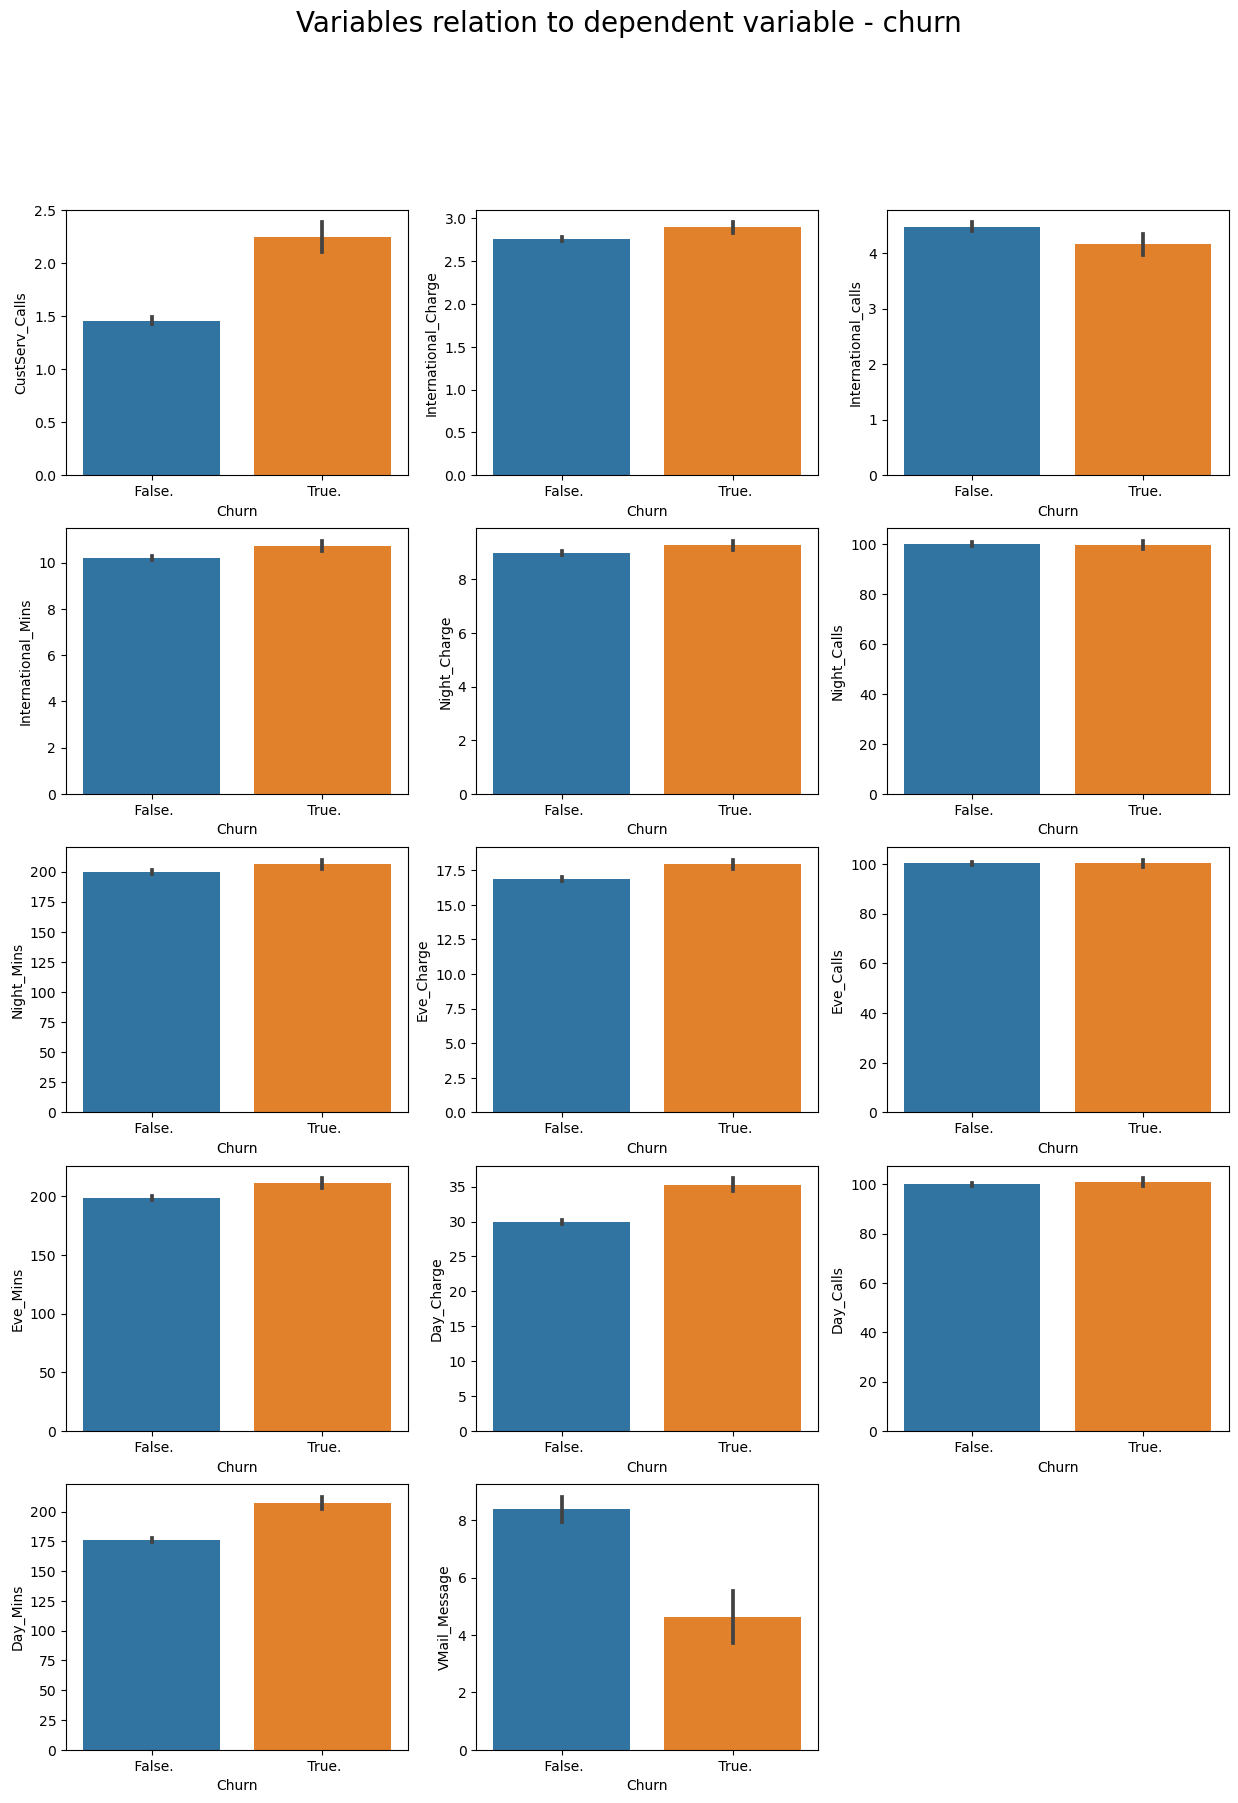

In [18]:
plt.figure(figsize = (15,20))
plt.subplot(5,3,1)
sns.barplot(x = 'Churn',y = 'CustServ_Calls',data = df1)
plt.subplot(5,3,2)
sns.barplot(x = 'Churn',y = 'International_Charge',data = df1)
plt.subplot(5,3,3)
sns.barplot(x = 'Churn',y = 'International_calls',data = df1)
plt.subplot(5,3,4)
sns.barplot(x = 'Churn',y = 'International_Mins',data = df1)
plt.subplot(5,3,5)
sns.barplot(x = 'Churn',y = 'Night_Charge',data = df1)
plt.subplot(5,3,6)
sns.barplot(x = 'Churn',y = 'Night_Calls',data = df1)
plt.subplot(5,3,7)
sns.barplot(x = 'Churn',y = 'Night_Mins',data = df1)
plt.subplot(5,3,8)
sns.barplot(x = 'Churn',y = 'Eve_Charge',data = df1)
plt.subplot(5,3,9)
sns.barplot(x = 'Churn',y = 'Eve_Calls',data = df1)
plt.subplot(5,3,10)
sns.barplot(x = 'Churn',y = 'Eve_Mins',data = df1)
plt.subplot(5,3,11)
sns.barplot(x = 'Churn',y = 'Day_Charge',data = df1)
plt.subplot(5,3,12)
sns.barplot(x = 'Churn',y = 'Day_Calls',data = df1)
plt.subplot(5,3,13)
sns.barplot(x = 'Churn',y = 'Day_Mins',data = df1)
plt.subplot(5,3,14)
sns.barplot(x = 'Churn',y = 'VMail_Message',data = df1)
plt.suptitle("Variables relation to dependent variable - churn", fontsize = 20)
plt.show()

Above plotting graphs to find the relationships between the features and the customer churn(target variable).

<Axes: xlabel='State'>

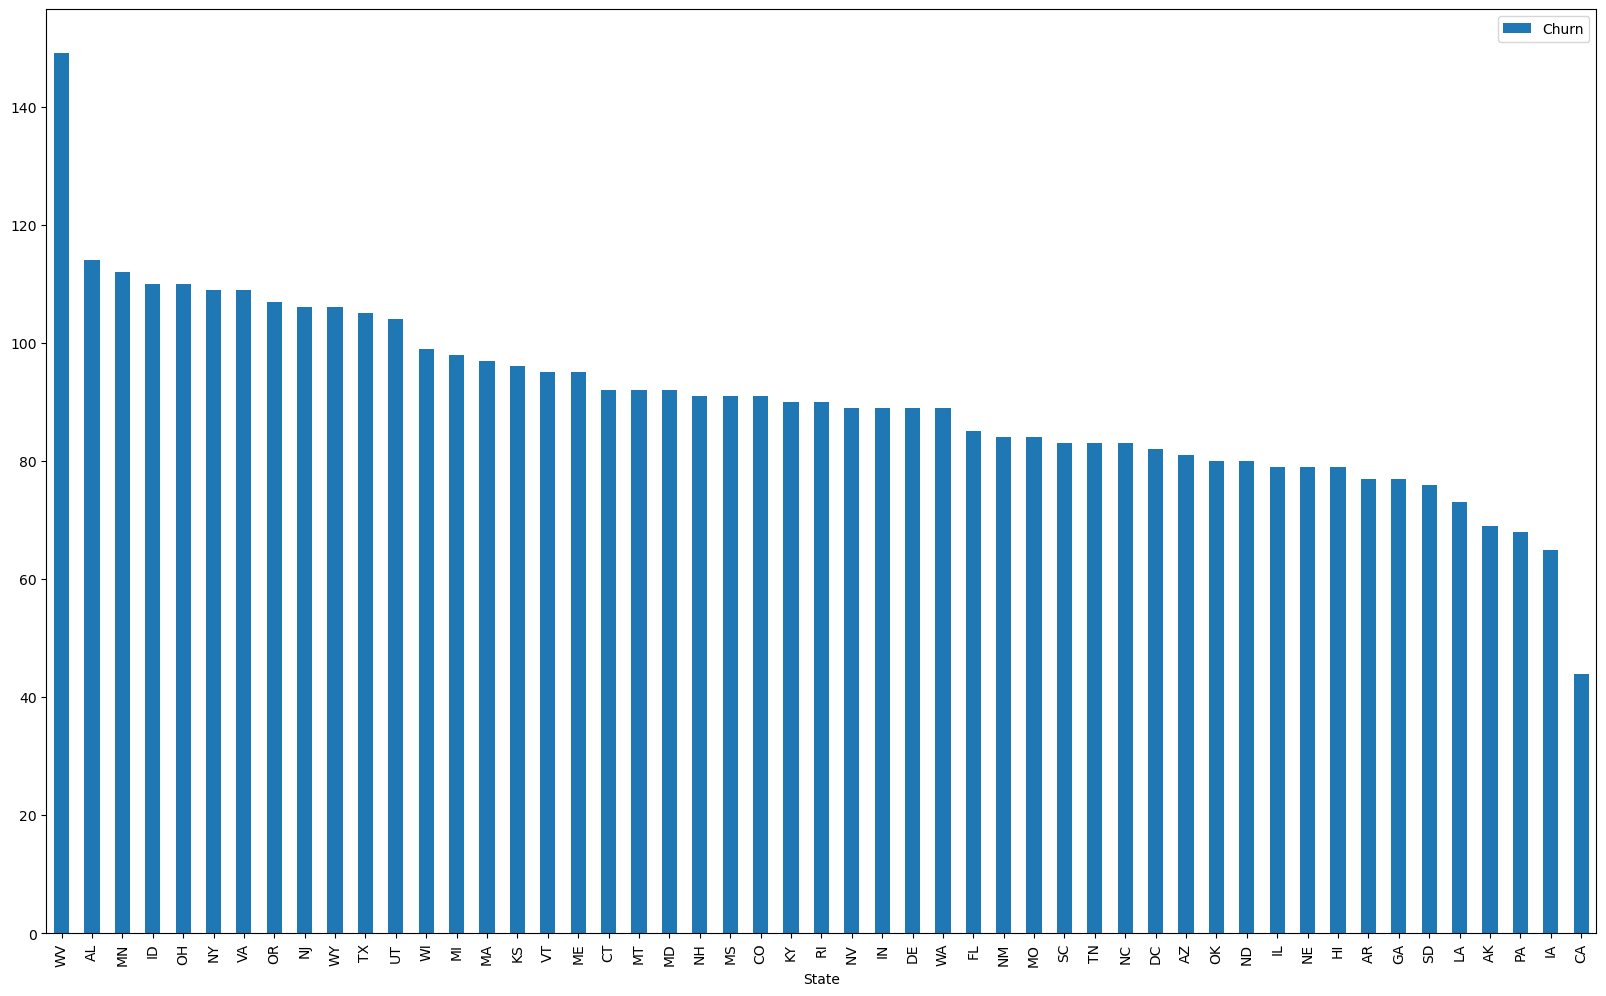

In [19]:
#State vs Churn count
df1.iloc[:,[0,-1]].groupby('State').count().sort_values('Churn',ascending=False).plot(kind='bar', figsize=(20,12))

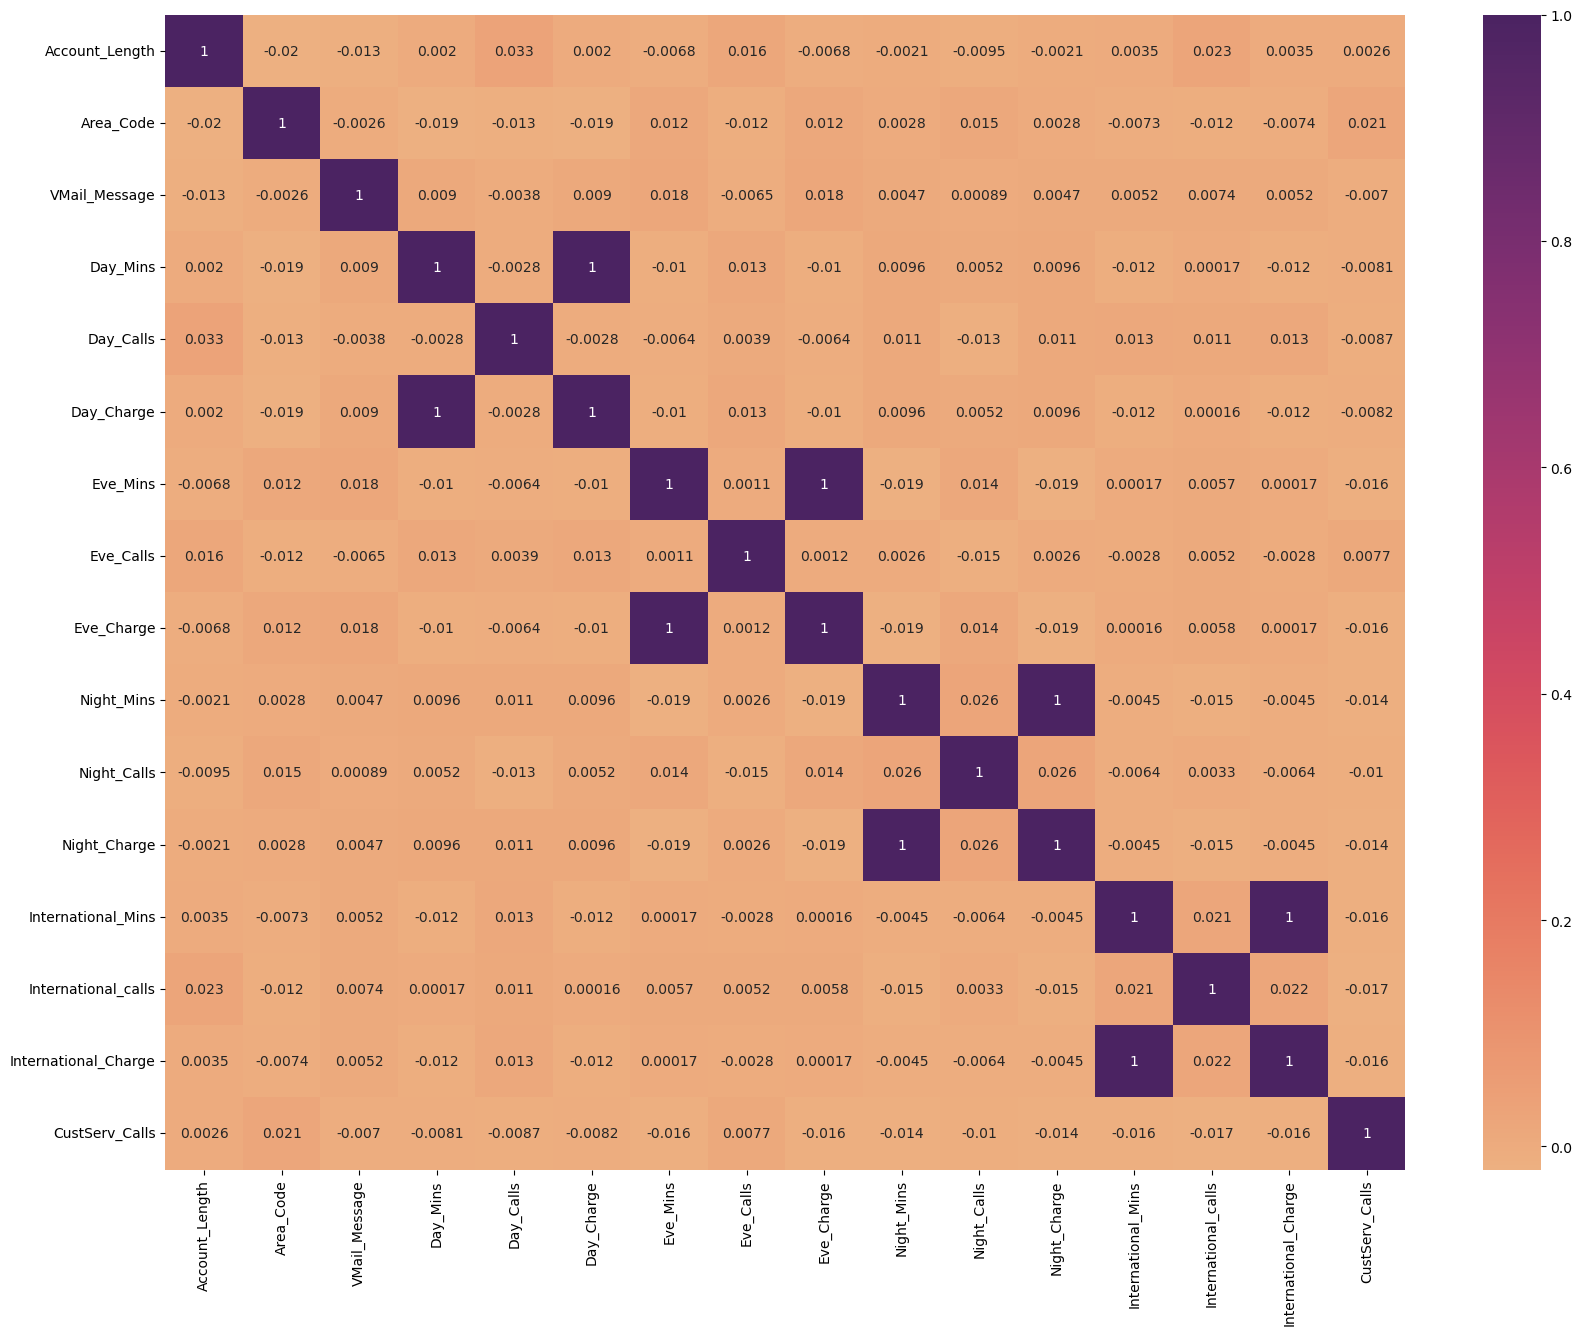

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), annot=True, cmap='flare');

From the above Correlation Plot

There are very good correlation between Day Mins & Day Charge, Eve Mins & Eve Charge, Night Mins & Night Charge, International Mins & International Charge

### Encoding

### Label Encoding

In [21]:
df1 = df1.replace({"Churn" : {" False." : 0," True." : 1}})

In [22]:
ohe_fe = ['State','Phone','International_Plan','VMail_Plan']
df1 = pd.get_dummies(df1, columns= ohe_fe)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Columns: 4689 entries, Account_Length to VMail_Plan_ yes
dtypes: float64(8), int64(9), uint8(4672)
memory usage: 21.2 MB


In [24]:
df1.head(10)

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,...,Phone_ 422-8268,Phone_ 422-8333,Phone_ 422-8344,Phone_ 422-8472,Phone_ 422-9831,Phone_ 422-9964,International_Plan_ no,International_Plan_ yes,VMail_Plan_ no,VMail_Plan_ yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,1,1,0
5,118,510,0,223.4,98,37.98,220.6,101,18.75,203.9,...,0,0,0,0,0,0,0,1,1,0
6,121,510,24,218.2,88,37.09,348.5,108,29.62,212.6,...,0,0,0,0,0,0,1,0,0,1
7,147,415,0,157.0,79,26.69,103.1,94,8.76,211.8,...,0,0,0,0,0,0,0,1,1,0
8,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0,0,0,0,0,0,1,0,1,0
9,141,415,37,258.6,84,43.96,222.0,111,18.87,326.4,...,0,0,0,0,0,0,0,1,0,1


### Modeling Buliding

In [25]:
X = df1.drop(columns=['Churn'])
y = df1.Churn

In [26]:
y.value_counts()

0    3961
1     656
Name: Churn, dtype: int64

### Model Buliding For imbalance data

In [27]:
#import module
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
sc = StandardScaler()

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train.shape,X_test.shape

((3693, 4688), (924, 4688))

### Logistic Regression

In [31]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
log_reg = LogisticRegression()

# Step:3 fitting traing data
log_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_reg.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_reg.predict(X_train)

#### EVALUATION

#### TRAINING ACCURACY

In [32]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 100.0
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [33]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regression model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regression model 85.93073593073593
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       923
           1       0.01      1.00      0.02         1

    accuracy                           0.86       924
   macro avg       0.50      0.93      0.47       924
weighted avg       1.00      0.86      0.92       924



### KNN

In [34]:
# Step:1 importing library and object creation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

# Step:2 fitting the training data
knn.fit(X_train,y_train)

# Step:3 Prediction on training data
knn_train_predict = knn.predict(X_train)

# Step:4 Prediction on testing data
knn_test_predict = knn.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [35]:
knn_train_accuracy = accuracy_score(knn_train_predict,y_train)
print("Training accuracy KNN:",knn_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(knn_train_predict,y_train))

Training accuracy KNN: 86.67749796913078
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      3644
           1       0.08      0.84      0.14        49

    accuracy                           0.87      3693
   macro avg       0.54      0.85      0.54      3693
weighted avg       0.99      0.87      0.92      3693



#### TESTING ACCURACY

In [36]:
knn_test_accuracy = accuracy_score(knn_test_predict,y_test)
print("Testing accuracy KNN:",knn_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(knn_test_predict,y_test))

Testing accuracy KNN: 86.03896103896103
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       918
           1       0.03      0.67      0.06         6

    accuracy                           0.86       924
   macro avg       0.51      0.76      0.49       924
weighted avg       0.99      0.86      0.92       924



### Decision Tree

In [37]:
# Step:1 importing library and object creation
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Step:2 fitting the training data
dtc.fit(X_train,y_train)

# Step:3 Prediction on training data
dtc_train_predict = dtc.predict(X_train)

# Step:4 Prediction on testing data
dtc_test_predict = dtc.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [38]:
dtc_train_accuracy = accuracy_score(dtc_train_predict,y_train)
print("Training accuracy Decision Tree:",dtc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(dtc_train_predict,y_train))

Training accuracy Decision Tree: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [39]:
dtc_test_accuracy = accuracy_score(dtc_test_predict,y_test)
print("Testing accuracy Decision Tree:",dtc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(dtc_test_predict,y_test))

Testing accuracy Decision Tree: 93.93939393939394
Classification report of training:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       819
           1       0.69      0.86      0.76       105

    accuracy                           0.94       924
   macro avg       0.83      0.90      0.86       924
weighted avg       0.95      0.94      0.94       924



### Random Forrest Classifier

In [40]:
# Step:1 importing library and object creation
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100) 

# Step:2 fitting the training data
rfc.fit(X_train,y_train)

# Step:3 Prediction on training data
rfc_train_predict = rfc.predict(X_train)

# Step:4 Prediction on testing data
rfc_test_predict = rfc.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [41]:
rfc_train_accuracy = accuracy_score(rfc_train_predict,y_train)
print("Training accuracy RFC classifier:",rfc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(rfc_train_predict,y_train))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [42]:
rfc_test_accuracy = accuracy_score(rfc_test_predict,y_test)
print("Testing accuracy RFC classifier:",rfc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(rfc_test_predict,y_test))

Testing accuracy RFC classifier: 91.88311688311688
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.92      0.95       864
           1       0.44      0.97      0.61        60

    accuracy                           0.92       924
   macro avg       0.72      0.94      0.78       924
weighted avg       0.96      0.92      0.93       924



### Support Vector Classifier

In [43]:
# Step:1 importing library and object creation
from sklearn.svm import SVC

svc_model = SVC() 

# Step:2 fitting the training data
svc_model.fit(X_train,y_train)

# Step:3 Prediction on training data
svc_model_train_predict = svc_model.predict(X_train)

# Step:4 Prediction on testing data
svc_model_test_predict = svc_model.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [44]:
svc_model_train_accuracy = accuracy_score(svc_model_train_predict,y_train)
print("Training accuracy RFC classifier:",svc_model_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(svc_model_train_predict,y_train))

Training accuracy RFC classifier: 98.4565393988627
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3225
           1       0.89      1.00      0.94       468

    accuracy                           0.98      3693
   macro avg       0.95      0.99      0.97      3693
weighted avg       0.99      0.98      0.98      3693



#### TESTING ACCURACY

In [45]:
svc_model_test_accuracy = accuracy_score(svc_model_test_predict,y_test)
print("Testing accuracy RFC classifier:",svc_model_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(svc_model_test_predict,y_test))

Testing accuracy RFC classifier: 85.82251082251082
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       924
           1       0.00      0.00      0.00         0

    accuracy                           0.86       924
   macro avg       0.50      0.43      0.46       924
weighted avg       1.00      0.86      0.92       924



### Model Buliding For Balaced data with SMOTE()

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [47]:
X_train_smote, y_train_smote = smote.fit_resample(X,y)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_smote, y_train_smote, test_size=0.20, random_state=42,stratify=y_train_smote)

In [50]:
#import module
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [51]:
X_train1.shape, X_test1.shape

((6337, 4688), (1585, 4688))

In [52]:
#y_train2.value_counts(), y_test2.value_counts()
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 3961, 1: 656})
SMOTE Classes Counter({0: 3961, 1: 3961})


### Logistic Regression

In [53]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
log_reg1 = LogisticRegression()

# Step:3 fitting traing data
log_reg1.fit(X_train1,y_train1)

# Step:4 Prediction on test data
log_test_predict1 = log_reg1.predict(X_test1)

# Step:5 Prediction on training data
log_train_predict1 = log_reg1.predict(X_train1)

#### EVALUATION

#### TRAINING ACCURACY

In [54]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy1 = accuracy_score(log_train_predict1,y_train1)
print("Training accuracy of Logistic regression model after SMOTE",log_train_accuracy1*100)
print("Logistic regression training Classification report after SMOTE: \n",classification_report(log_train_predict1,y_train1))

Training accuracy of Logistic regression model after SMOTE 100.0
Logistic regression training Classification report after SMOTE: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      3169

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [55]:
log_test_accuracy1 = accuracy_score(log_test_predict1,y_test1)
print("Testing accuracy of Logistic regression model after SMOTE",log_test_accuracy1*100)
print("Logistic regression testing Classification report after SMOTE: \n",classification_report(log_test_predict1,y_test1))

Testing accuracy of Logistic regression model after SMOTE 66.62460567823344
Logistic regression testing Classification report after SMOTE: 
               precision    recall  f1-score   support

           0       0.34      0.97      0.51       278
           1       0.99      0.60      0.75      1307

    accuracy                           0.67      1585
   macro avg       0.67      0.79      0.63      1585
weighted avg       0.88      0.67      0.71      1585



In [56]:
# Area Under Curvefrom sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test1, log_test_predict1)
auc

0.6664509215738723

In [57]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test1, log_test_predict1)
threshold

array([2, 1, 0], dtype=int64)

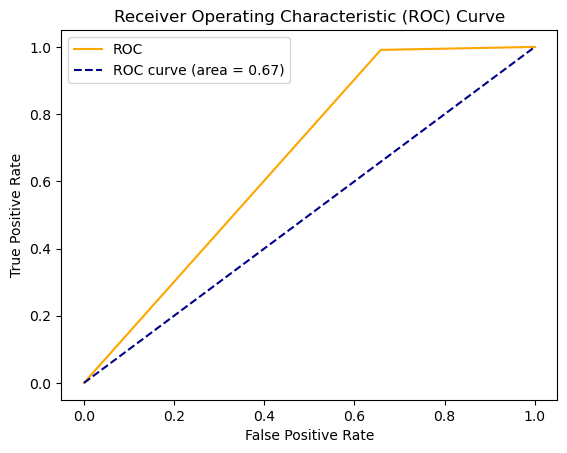

In [58]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

[0.         0.00126263 0.77651515 0.77651515 0.78914141 0.78914141
 0.79166667 0.79166667 0.80555556 0.80555556 0.82070707 0.82070707
 0.8219697  0.8219697  0.83585859 0.83585859 0.83838384 0.83838384
 0.84343434 0.84343434 0.8459596  0.8459596  0.84848485 0.84848485
 0.84974747 0.84974747 0.85227273 0.85227273 0.85479798 0.85479798
 0.85606061 0.85606061 0.85732323 0.85732323 0.86237374 0.86237374
 0.86363636 0.86363636 0.86489899 0.86489899 0.86616162 0.86616162
 0.86742424 0.86742424 0.87121212 0.87121212 0.87373737 0.87373737
 0.87626263 0.87626263 0.87752525 0.87752525 0.87878788 0.87878788
 0.88005051 0.88005051 0.88131313 0.88131313 0.88257576 0.88257576
 0.88383838 0.88383838 0.88510101 0.88510101 0.88636364 0.88636364
 0.88888889 0.88888889 0.89015152 0.89015152 0.89141414 0.89141414
 0.89267677 0.89267677 0.89520202 0.89520202 0.89646465 0.89646465
 0.89772727 0.89772727 0.90025253 0.90025253 0.90656566 0.90656566
 0.90782828 0.90782828 0.91161616 0.91161616 0.91540404 0.9154

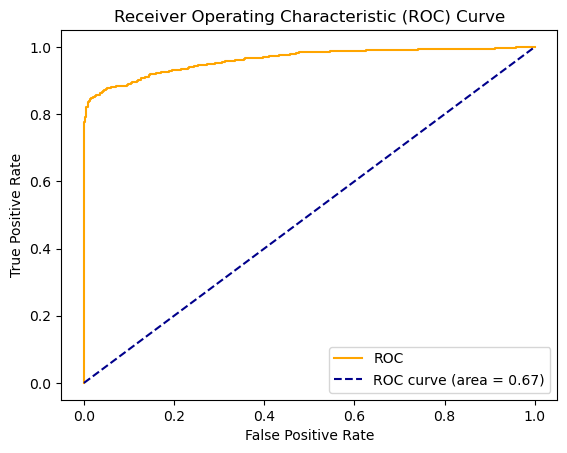

In [59]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test1, log_reg1.predict_proba(X_test1)[:,1])
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test1,log_reg1.predict_proba(X_test1)[:,1]))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

### KNN

In [60]:
# Step:1 importing library and object creation
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=9)

# Step:2 fitting the training data
knn1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
knn_train_predict1 = knn1.predict(X_train1)

# Step:4 Prediction on testing data
knn_test_predict1 = knn1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [61]:
knn_train_accuracy1 = accuracy_score(knn_train_predict1,y_train1)
print("Training accuracy KNN:",knn_train_accuracy1*100)
print("Classification report of training after SMOTE:"'\n',classification_report(knn_train_predict1,y_train1))

Training accuracy KNN: 50.00789016884961
Classification report of training after SMOTE:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      6337

    accuracy                           0.50      6337
   macro avg       0.50      0.25      0.33      6337
weighted avg       1.00      0.50      0.67      6337



#### TESTING ACCURACY

In [62]:
knn_test_accuracy1 = accuracy_score(knn_test_predict1,y_test1)
print("Testing accuracy KNN after SMOTE:",knn_test_accuracy1*100)
print("Classification report of training after SMOTE:"'\n',classification_report(knn_test_predict1,y_test1))

Testing accuracy KNN after SMOTE: 49.968454258675074
Classification report of training after SMOTE:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      1585

    accuracy                           0.50      1585
   macro avg       0.50      0.25      0.33      1585
weighted avg       1.00      0.50      0.67      1585



In [63]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(knn_test_predict1,y_test1)
threshold

array([2, 1, 0], dtype=int64)

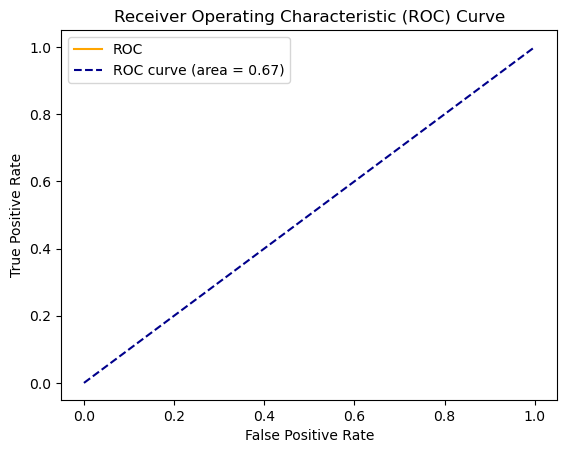

In [64]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### DecisionTreeClassifier

In [65]:
# Step:1 importing library and object creation
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()

# Step:2 fitting the training data
dtc1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
dtc_train_predict1 = dtc1.predict(X_train1)

# Step:4 Prediction on testing data
dtc_test_predict1 = dtc1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [66]:
dtc_train_accuracy1 = accuracy_score(dtc_train_predict1,y_train1)
print("Training accuracy Decision Tree:",dtc_train_accuracy1*100)
print("Classification report of training after SMOTE:"'\n',classification_report(dtc_train_predict1,y_train1))

Training accuracy Decision Tree: 100.0
Classification report of training after SMOTE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      3169

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [67]:
dtc_test_accuracy1 = accuracy_score(dtc_test_predict1,y_test1)
print("Testing accuracy Decision Tree after SMOTE:",dtc_test_accuracy1*100)
print("Classification report of training after SMOTE:"'\n',classification_report(dtc_test_predict1,y_test1))

Testing accuracy Decision Tree after SMOTE: 92.11356466876973
Classification report of training after SMOTE:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       752
           1       0.95      0.90      0.92       833

    accuracy                           0.92      1585
   macro avg       0.92      0.92      0.92      1585
weighted avg       0.92      0.92      0.92      1585



In [68]:
# Area Under Curvefrom sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(dtc_test_predict1,y_test1)
auc

0.9222545401139179

In [69]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(dtc_test_predict1,y_test1)
threshold

array([2, 1, 0], dtype=int64)

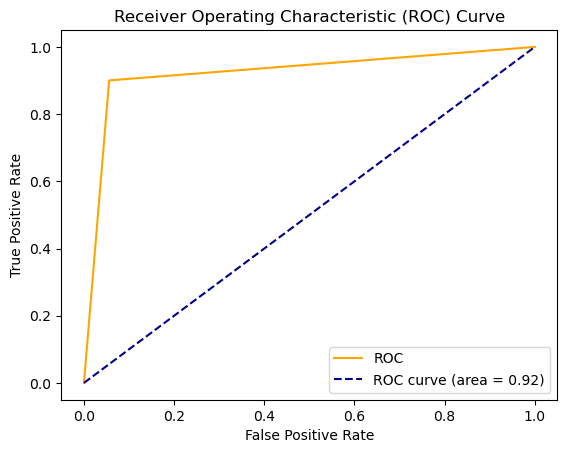

In [70]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Hyper parameter tunning for DecisionTree

In [71]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [72]:
# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [73]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(dtc1, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]})

In [74]:
# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score:  0.6324654727255072


In [75]:
dtc1_model = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 1, min_samples_split= 5,criterion = 'gini', max_features = 'sqrt')

In [76]:
dtc1_model.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_split=5)

In [77]:
dtc1_model_test_predict = dtc1_model.predict(X_test1)

In [78]:
print(classification_report(y_test1, dtc1_model_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.41      0.54       793
           1       0.60      0.88      0.71       792

    accuracy                           0.64      1585
   macro avg       0.68      0.64      0.62      1585
weighted avg       0.68      0.64      0.62      1585



### Random Forest Classifier

In [79]:
# Step:1 importing library and object creation
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators = 100) 

# Step:2 fitting the training data
rfc1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
rfc_train_predict1 = rfc1.predict(X_train1)

# Step:4 Prediction on testing data
rfc_test_predict1 = rfc1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [80]:
rfc_train_accuracy1 = accuracy_score(rfc_train_predict1,y_train1)
print("Training accuracy RFC classifier:",rfc_train_accuracy1*100)
print("Classification report of training:"'\n',classification_report(rfc_train_predict1,y_train1))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      3169

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [81]:
rfc_test_accuracy1 = accuracy_score(rfc_test_predict1,y_test1)
print("Testing accuracy RFC classifier:",rfc_test_accuracy1*100)
print("Classification report of training:"'\n',classification_report(rfc_test_predict1,y_test1))

Testing accuracy RFC classifier: 95.77287066246056
Classification report of training:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       794
           1       0.96      0.96      0.96       791

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585



### Gradient Boosting Classifier

In [82]:
#Step:1 importing library
from sklearn.ensemble import GradientBoostingClassifier

# Step:2 Object creation 
gbc_reg1 = GradientBoostingClassifier()

# Step:3 fitting traing data
gbc_reg1.fit(X_train1,y_train1)

# Step:4 Prediction on test data
gbc_test_predict1 = gbc_reg1.predict(X_test1)

# Step:5 Prediction on training data
gbc_train_predict1 = gbc_reg1.predict(X_train1)

#### EVALUATION

#### TRAINING ACCURACY

In [83]:
gbc_train_accuracy1 = accuracy_score(gbc_train_predict1,y_train1)
print("Training accuracy of Gradient Boosting model",gbc_train_accuracy1*100)
print("Gradient Boosting training Classification report: \n",classification_report(gbc_train_predict1,y_train1))

Training accuracy of Gradient Boosting model 93.73520593340697
Gradient Boosting training Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      3345
           1       0.91      0.96      0.94      2992

    accuracy                           0.94      6337
   macro avg       0.94      0.94      0.94      6337
weighted avg       0.94      0.94      0.94      6337



#### TESTING ACCURACY

In [84]:
gbc_test_accuracy1 = accuracy_score(gbc_test_predict1,y_test1)
print("Testing accuracy of Gradient Boosting model",gbc_test_accuracy1*100)
print("Gradient Boosting testing Classification report: \n",classification_report(gbc_test_predict1,y_test1))

Testing accuracy of Gradient Boosting model 91.41955835962146
Gradient Boosting testing Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       831
           1       0.89      0.94      0.91       754

    accuracy                           0.91      1585
   macro avg       0.91      0.92      0.91      1585
weighted avg       0.92      0.91      0.91      1585



### Support Vector Classifier

In [85]:
# Step:1 importing library and object creation
from sklearn.svm import SVC

svc_model1 = SVC() 

# Step:2 fitting the training data
svc_model1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
svc_model_train_predict1 = svc_model1.predict(X_train1)

# Step:4 Prediction on testing data
svc_model_test_predict1 = svc_model1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [86]:
svc_model_train_accuracy1 = accuracy_score(svc_model_train_predict1,y_train1)
print("Training accuracy RFC classifier:",svc_model_train_accuracy1*100)
print("Classification report of training:"'\n',classification_report(svc_model_train_predict1,y_train1))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      3169

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [87]:
svc_model_test_accuracy1 = accuracy_score(svc_model_test_predict1,y_test1)
print("Testing accuracy RFC classifier:",svc_model_test_accuracy1*100)
print("Classification report of training:"'\n',classification_report(svc_model_test_predict1,y_test1))

Testing accuracy RFC classifier: 49.968454258675074
Classification report of training:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      1585

    accuracy                           0.50      1585
   macro avg       0.50      0.25      0.33      1585
weighted avg       1.00      0.50      0.67      1585



### Dropping some columns:

In [88]:
df_drop= df2.drop(['State','Account_Length','Area_Code','Phone'], axis=1)
df_drop.head(5)

,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Encoding

#### Label Encoding

In [89]:
df_drop = df_drop.replace({"Churn" : {" False." : 0," True." : 1}})

In [90]:
ohe_fe1 = ['International_Plan','VMail_Plan']
df_drop1 = pd.get_dummies(df_drop, columns= ohe_fe1)

In [91]:
df_drop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   VMail_Message            4617 non-null   int64  
 1   Day_Mins                 4617 non-null   float64
 2   Day_Calls                4617 non-null   int64  
 3   Day_Charge               4617 non-null   float64
 4   Eve_Mins                 4617 non-null   float64
 5   Eve_Calls                4617 non-null   int64  
 6   Eve_Charge               4617 non-null   float64
 7   Night_Mins               4617 non-null   float64
 8   Night_Calls              4617 non-null   int64  
 9   Night_Charge             4617 non-null   float64
 10  International_Mins       4617 non-null   float64
 11  International_calls      4617 non-null   int64  
 12  International_Charge     4617 non-null   float64
 13  CustServ_Calls           4617 non-null   int64  
 14  Churn                   

In [92]:
df_drop1.head(5)

,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn,International_Plan_ no,International_Plan_ yes,VMail_Plan_ no,VMail_Plan_ yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,1,0


### Modeling Buliding

In [93]:
x1 = df_drop1.drop(columns=['Churn'])
y1 = df_drop1.Churn

In [94]:
x1.head(5)

,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,International_Plan_ no,International_Plan_ yes,VMail_Plan_ no,VMail_Plan_ yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,1,0


#### Using of SMOTE on Dropped data

In [95]:
sm_drop= SMOTE(sampling_strategy='minority')

In [96]:
x_sm_drop,y_sm_drop= sm_drop.fit_resample(x1,y1)

In [97]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(x1, y1, test_size=0.20, random_state=42, stratify=y1)

In [98]:
#import module
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
sc_drop = StandardScaler()
X_train3 = sc_drop.fit_transform(X_train3)
X_test3 = sc_drop.transform(X_test3)

In [99]:
X_train3.shape, X_test3.shape

((3693, 18), (924, 18))

In [100]:
#y_train2.value_counts(), y_test2.value_counts()
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_sm_drop))

Actual Classes Counter({0: 3961, 1: 656})
SMOTE Classes Counter({0: 3961, 1: 3961})


In [101]:
y_train3.shape, y_test3.shape

((3693,), (924,))

In [102]:
y_train3.value_counts(), y_test3.value_counts()

(0    3168
 1     525
 Name: Churn, dtype: int64,
 0    793
 1    131
 Name: Churn, dtype: int64)

### Logistic Regression

In [103]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
log_reg3 = LogisticRegression()

# Step:3 fitting traing data
log_reg3.fit(X_train3,y_train3)

# Step:4 Prediction on test data
log_test_predict3 = log_reg3.predict(X_test3)

# Step:5 Prediction on training data
log_train_predict3 = log_reg3.predict(X_train3)

#### EVALUATION

#### TRAINING ACCURACY

In [104]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy3 = accuracy_score(log_train_predict3,y_train3)
print("Training accuracy of Logistic regression model after SMOTE",log_train_accuracy3*100)
print("Logistic regression training Classification report after SMOTE: \n",classification_report(log_train_predict3,y_train3))

Training accuracy of Logistic regression model after SMOTE 86.48795017600867
Logistic regression training Classification report after SMOTE: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.93      3507
           1       0.20      0.57      0.30       186

    accuracy                           0.86      3693
   macro avg       0.59      0.73      0.61      3693
weighted avg       0.94      0.86      0.89      3693



#### TESTING ACCURACY

In [105]:
log_test_accuracy3 = accuracy_score(log_test_predict3,y_test3)
print("Testing accuracy of Logistic regression model after SMOTE",log_test_accuracy3*100)
print("Logistic regression testing Classification report after SMOTE: \n",classification_report(log_test_predict3,y_test3))

Testing accuracy of Logistic regression model after SMOTE 86.03896103896103
Logistic regression testing Classification report after SMOTE: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       876
           1       0.19      0.52      0.28        48

    accuracy                           0.86       924
   macro avg       0.58      0.70      0.60       924
weighted avg       0.93      0.86      0.89       924



### Random Forrest Classifier

In [106]:
# Step:1 importing library and object creation
from sklearn.ensemble import RandomForestClassifier

rfc3 = RandomForestClassifier(n_estimators = 100) 

# Step:2 fitting the training data
rfc3.fit(X_train3,y_train3)

# Step:3 Prediction on training data
rfc_train_predict3 = rfc3.predict(X_train3)

# Step:4 Prediction on testing data
rfc_test_predict3 = rfc3.predict(X_test3)

#### EVALUATION

#### TRAINING ACCURACY

In [107]:
rfc_train_accuracy3 = accuracy_score(rfc_train_predict3,y_train3)
print("Training accuracy RFC classifier:",rfc_train_accuracy3*100)
print("Classification report of training:"'\n',classification_report(rfc_train_predict3,y_train3))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [108]:
rfc_test_accuracy3 = accuracy_score(rfc_test_predict3,y_test3)
print("Testing accuracy RFC classifier:",rfc_test_accuracy3*100)
print("Classification report of training:"'\n',classification_report(rfc_test_predict3,y_test3))

Testing accuracy RFC classifier: 95.12987012987013
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       818
           1       0.73      0.91      0.81       106

    accuracy                           0.95       924
   macro avg       0.86      0.93      0.89       924
weighted avg       0.96      0.95      0.95       924



### Support Vector Classifier

In [109]:
# Step:1 importing library and object creation
from sklearn.svm import SVC

svc_model3 = SVC() 

# Step:2 fitting the training data
svc_model3.fit(X_train3,y_train3)

# Step:3 Prediction on training data
svc_model_train_predict3 = svc_model3.predict(X_train3)

# Step:4 Prediction on testing data
svc_model_test_predict3 = svc_model3.predict(X_test3)

#### EVALUATION

#### TRAINING ACCURACY

In [110]:
svc_model_train_accuracy3 = accuracy_score(svc_model_train_predict3,y_train3)
print("Training accuracy RFC classifier:",svc_model_train_accuracy3*100)
print("Classification report of training:"'\n',classification_report(svc_model_train_predict3,y_train3))

Training accuracy RFC classifier: 95.20714865962631
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      3325
           1       0.68      0.97      0.80       368

    accuracy                           0.95      3693
   macro avg       0.84      0.96      0.89      3693
weighted avg       0.97      0.95      0.96      3693



#### TESTING ACCURACY

In [111]:
svc_model_test_accuracy3 = accuracy_score(svc_model_test_predict3,y_test3)
print("Testing accuracy RFC classifier:",svc_model_test_accuracy3*100)
print("Classification report of training:"'\n',classification_report(svc_model_test_predict3,y_test3))

Testing accuracy RFC classifier: 92.09956709956711
Classification report of training:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       838
           1       0.55      0.84      0.66        86

    accuracy                           0.92       924
   macro avg       0.77      0.88      0.81       924
weighted avg       0.94      0.92      0.93       924



OBSERVATION:
    
    Without SMOTE() technique applied to churn
    
        1. Linear Regression is not working on training data as well as testing data the testing score is 85.93.
        
        2. KNN is not working on training data as well as testing data the testing score is 86.03.
        
        3. Random Forest is working well on training data as well as testing data the testing score is 91.23.
        
        4. Support Vector Machine is not working on training data as well as testing data the testing score is 85.82.
        
        5. Gradient Boosting is not working on training data as well as testing data the testing score is 94.58. 
    
    With SMOTE() technique applied to churn
    
        1. Linear Regression is not working on training data as well as testing data the testing score is 65.55.(Decreased after  SMOTE())
        
        2. KNN is not working on training data as well as testing data the testing score is 49.96.(Decreased after SMOTE())
        
        3. Random Forest is working well on training data as well as testing data the testing score is 96.21.
        
        4. Support Vector Machine is not working on training data as well as testing data the testing score is 49.96.(Decreased after SMOTE())
        
        5. Gradient Boosting is not working on training data as well as testing data the testing score is 92.17.(Decreased after SMOTE())
        
    Using of SMOTE on Dropped data
    
        1. Linear Regression is not working on training data as well as testing data the testing score is 86.038.
        
        3. Random Forest is working well on training data as well as testing data the testing score is 95.129.
        
        4. Support Vector Machine is not working on training data as well as testing data the testing score is 92.099.
        
    